# Numeric tests

This notebook contains various experiments for the performance of the ray-tracing / ODE algorithm.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from numeric_tests import *

These plots demonstrate the results of the method. Ray paths and final deflection angle are shown as a function of initial angle.

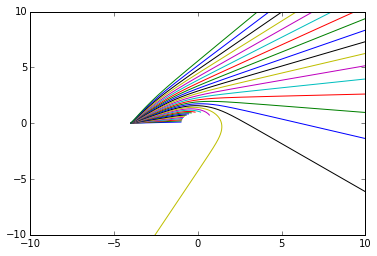

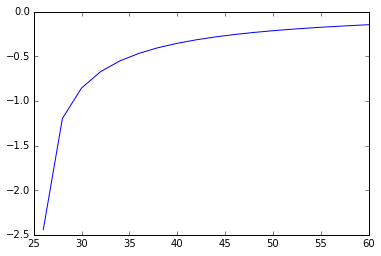

In [3]:
for ray in trace_rays(n_rays = 30, plot_scale=10):
    ray.angle = ray.rel*60
    ray.aggregate_plot_x = lambda _: ray.angle
    ray.aggregate_plot_y = deflection_angle

### Effects of step count

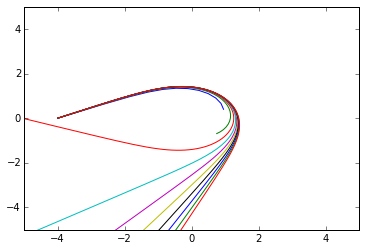

In [104]:
for ray in trace_rays(n_rays = 10, angle = 26):
    ray.n_steps = 50 * (1+ray.idx)

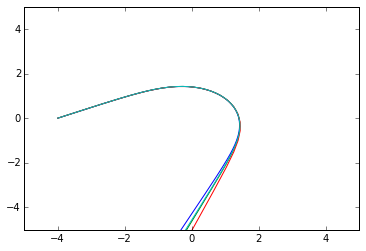

In [120]:
trace_ray(angle=26, n_steps=500)
trace_ray(angle=26.55, n_steps=100);
trace_ray(angle=27.3, n_steps=50);
trace_ray(angle=25.95, n_steps=1000);

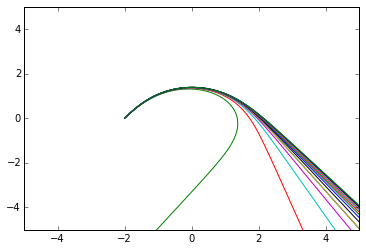

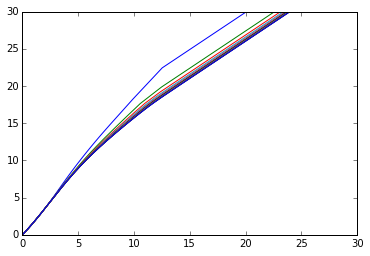

In [124]:
ray_params = { 'angle': 56, 'x0': -2 }
trace_ray(**ray_params)
for ray in trace_rays(n_rays = 15, **ray_params):
    ray.n_steps = 100 * (1+ray.idx)
plt.show()
for ray in trace_rays(n_rays = 15, **ray_params):
    ray.n_steps = 100 * (1+ray.idx)
    ray.plot_x = path_arc_length
    ray.plot_y = path_time
    ray.plot_xlim = [0,30]
    ray.plot_ylim = [0,30]

### Smoothness of time coordinate

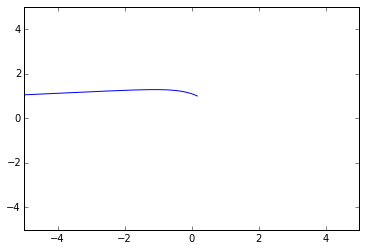

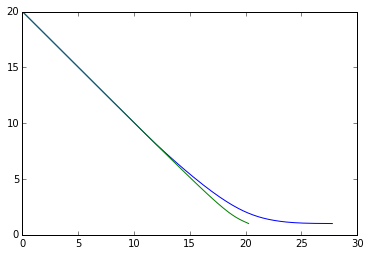

17.5066540727
16.740418051


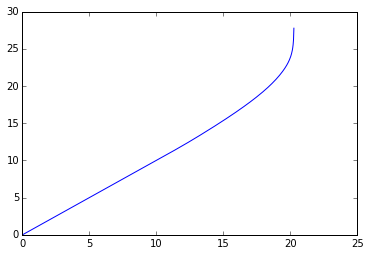

In [125]:
path = trace_ray(x0 = -20, angle=4)
plt.show()
plt.plot(path_time(path), path_r(path))
plt.plot(path_arc_length(path), path_r(path))
plt.show()
plt.plot(path_arc_length(path), path_time(path))
print ball_entry_time(path, 3.5)
print ball_entry_dist(path, 3.5)

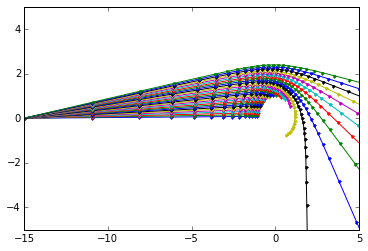

(0, 30)

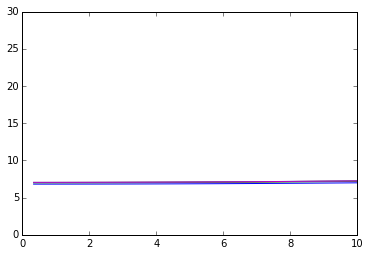

In [126]:
radius = 8.0
for n_steps in [100,200,500,1500,5000]:
    for ray in trace_rays(n_rays = 30, x0 = -15, plot=n_steps==100, n_steps=n_steps):
        ray.angle = ray.rel*10
        ray.aggregate_plot_x = lambda _: ray.angle
        ray.aggregate_plot_y = lambda p: ball_entry_time(p, radius=radius)
        
        # first figure
        ray.plot_args['marker'] = '.'
        ray.plot_xlim = [-15,5]
plt.ylim([0,30])

### Looking away from the black hole

(the "blind spot" bug)

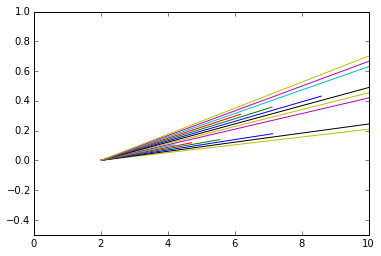

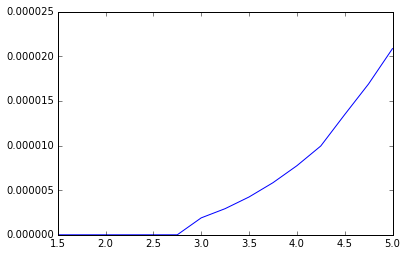

In [22]:
for ray in trace_rays(n_rays = 20, x0 = 2):
    ray.angle = ray.rel * 5.0
    ray.plot_xlim = [0,10]
    ray.plot_ylim = [-0.5,1]
    ray.aggregate_plot_x = lambda _: ray.angle
    ray.aggregate_plot_y = deflection_angle